In [ ]:
# NOTES on installing modules!!!
# - You should install pandas again using current active python interpreter. 
# - For example if your current interpreter is located in:
# - ~\AppData\Local\Microsoft\WindowsApps\python3.11.exe
# - then you should install pandas using this command:
# - ~\AppData\Local\Microsoft\WindowsApps\python3.11.exe -m pip install pandas

In [2]:
# imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

In [11]:
# get df and remove unnecessary columns
abs_data_file_path = "C:/Users/benha/Documents/Classes/ECS 171/Project/injury_data.csv"
target_label = 'Likelihood_of_Injury'

df = pd.read_csv(abs_data_file_path)

# Used df.types to find all non numerical columns
print(df.dtypes)

non_numerical_columns = []
domain_knowledge_drops = []

cols_to_drop = non_numerical_columns + domain_knowledge_drops

clean_df = df.drop(columns=cols_to_drop)

clean_df

Player_Age                int64
Player_Weight           float64
Player_Height           float64
Previous_Injuries         int64
Training_Intensity      float64
Recovery_Time             int64
Likelihood_of_Injury      int64
dtype: object


,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1
...,...,...,...,...,...,...,...
995,23,99.147910,165.290912,0,0.077857,3,1
996,23,75.799934,178.132281,1,0.955448,1,0
997,20,78.479061,173.823908,0,0.246961,1,1
998,24,66.915802,197.616889,1,0.859645,2,0


In [17]:
# scale df
scaler = StandardScaler() # initialize scaler

clean_df = scaler.fit_transform(clean_df) # fit transform to prepare scaler

clean_df = pd.DataFrame.from_records(clean_df)

clean_df.columns = df.columns

clean_df.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,-0.647426,-0.863946,-0.406569,0.970437,-0.114001,0.902221,-1.0
1,1.341829,-0.384123,-0.522998,-1.030464,-0.923001,1.490371,1.0
2,0.576731,0.535963,0.665589,-1.030464,0.431519,-0.862227,1.0
3,-0.035348,1.282296,-0.429656,0.970437,-0.830929,0.314072,1.0
4,-0.494407,0.997694,1.054643,-1.030464,0.304480,-1.450376,1.0


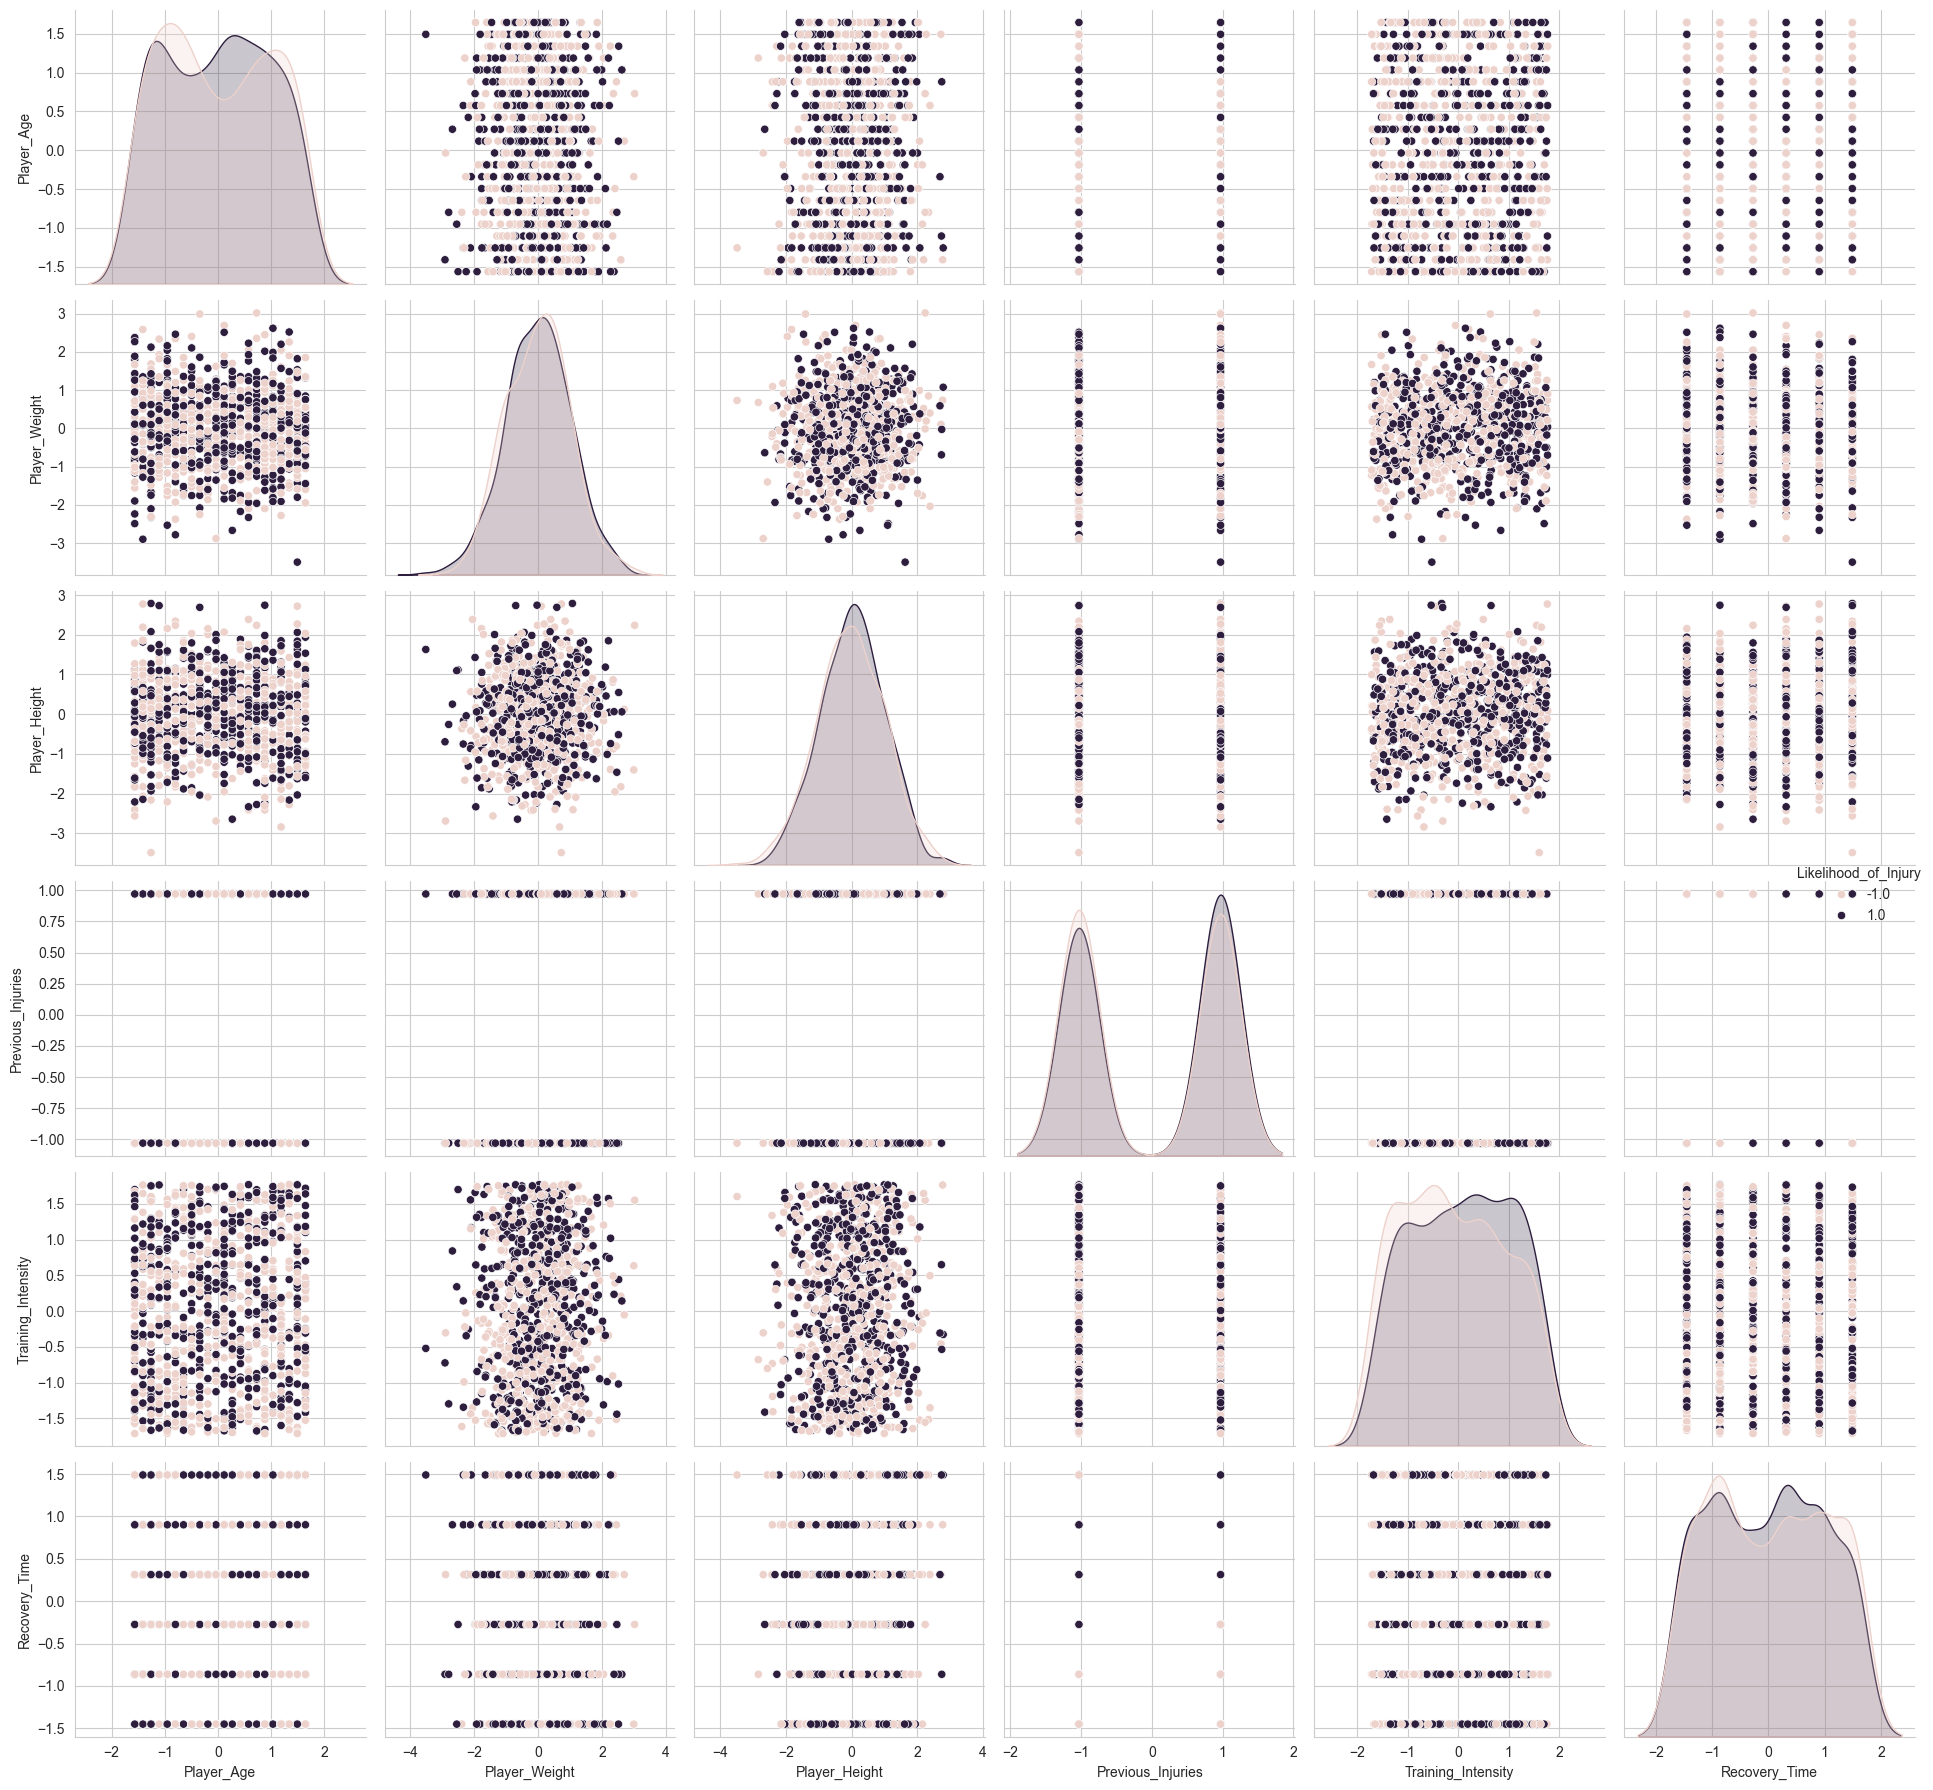

In [18]:
sns.set_style("whitegrid")
sns.pairplot(clean_df, hue="Likelihood_of_Injury", height=3)
plt.tight_layout()
plt.show()

In [3]:
# know that all elements are numerical and have 2+ unique elements
# wanna mazimize variance...

clean_df.var().sort_values()

Previous_Injuries         0.250025
Likelihood_of_Injury      0.250250
Player_Age               42.750389
Player_Height            97.790767
Player_Weight            97.863954
Recovery_Time           289.373774
Training_Intensity      819.014911
dtype: float64

In [4]:
# ...and minimize correlation

clean_df.corr()[target_label].sort_values()

Recovery_Time          -0.015292
Player_Age              0.000153
Player_Weight           0.001843
Player_Height           0.029639
Previous_Injuries       0.038017
Training_Intensity      0.089250
Likelihood_of_Injury    1.000000
Name: Likelihood_of_Injury, dtype: float64

In [5]:
# to do that, use the 11 columns with the highest variance;
# only keep them if they're also in the top 11 for absolute value of correlation

top_var = clean_df.var().sort_values()[-6:]
top_corr = abs(clean_df.corr()[target_label]).sort_values()[-6:]

top_cols = []

for index in top_var.index:
    if index in top_corr.index and index != target_label:
        top_cols.append(index)

top_cols

['Player_Height', 'Player_Weight', 'Recovery_Time', 'Training_Intensity']

In [34]:
# Split data

X = clean_df.drop(columns=[target_label])
y = clean_df[target_label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=17, shuffle=False)

In [35]:
# scale X's
scaler = StandardScaler() # initialize scaler

X_train_scaled = scaler.fit_transform(X_train) # fit transform to prepare scaler
X_test_scaled = scaler.transform(X_test) # just fit to not impede model training

In [22]:
# train model
initial_k = int(math.sqrt(clean_df.shape[0])) # sqrt of number of datapoint is good starting k

model = DecisionTreeClassifier(max_depth=100)
#model = LogisticRegression()

model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=100)

In [23]:
# test performance
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_pred=y_pred, y_true=y_test)
print(accuracy)

0.5


Text(0.5, 1.0, 'Accuracies on X_test for varying hyperparameter values')

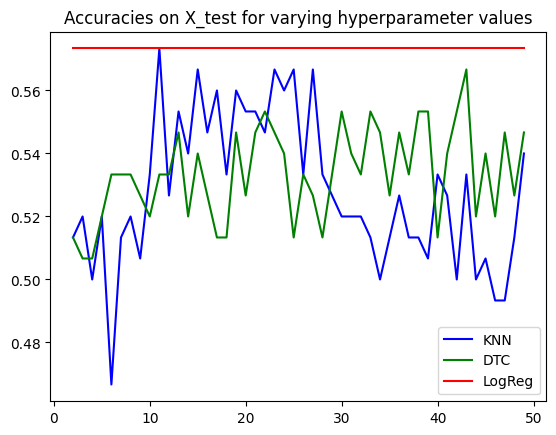

In [38]:
# create a code that'll experiment with various training accuracies and hyperparameters
# Assume smallest hyperparameter is 2 and largest is 100
min_hyperparam = 2
max_hyperparam = 50

knn_accs = []
dtc_accs = []
logreg_accs = []

for i in range(min_hyperparam, max_hyperparam):
    knn = KNeighborsClassifier(n_neighbors=i)
    dtc = DecisionTreeClassifier(max_depth=i)
    logreg = LogisticRegression()

    knn.fit(X_train, y_train)
    dtc.fit(X_train, y_train)
    logreg.fit(X_train, y_train)

    knn_pred = knn.predict(X_test)
    dtc_pred = dtc.predict(X_test)
    logreg_pred = logreg.predict(X_test)

    knn_accs.append(accuracy_score(y_pred=knn_pred, y_true=y_test))
    dtc_accs.append(accuracy_score(y_pred=dtc_pred, y_true=y_test))
    logreg_accs.append(accuracy_score(y_pred=logreg_pred, y_true=y_test))

# plot accuracies for varying input parameters
hyperparam_vals = [i for i in range(min_hyperparam, max_hyperparam)]

plt.plot(hyperparam_vals, knn_accs, color="blue", label='KNN')
plt.plot(hyperparam_vals, dtc_accs, color="green", label='DTC')
plt.plot(hyperparam_vals, logreg_accs, color="red", label='LogReg')
plt.legend()
plt.title("Accuracies on X_test for varying hyperparameter values")

ValueError: X has 2 features, but KNeighborsClassifier is expecting 5 features as input.

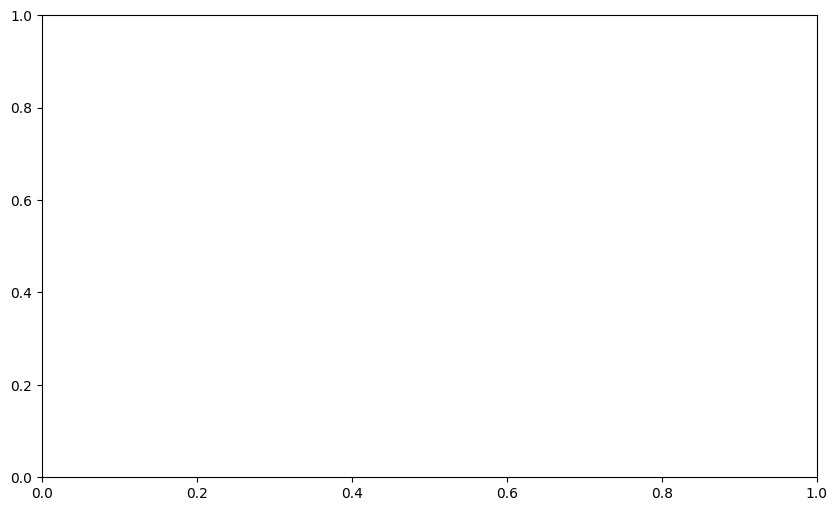

In [50]:
# TO VISUALIZE DECISION BOUNDARY - UNEDITED
fig, ax = plt.subplots(figsize=(10,6))
xx, yy = np.meshgrid(np.arange(6, 30, 0.1), np.arange(6, 42, 0.1))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
ax.pcolormesh(xx, yy, z, alpha=0.1)
for label, data in df.groupby('Hazardous'):
    ax.scatter(clean_df["Est Dia in M(min)"], clean_df["Relative Velocity km per hr"],
    label=["Hazardous", "Safe"][label])
ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel("Est Dia in M(min)")
ax.set_ylabel("Relative Velocity km per hr")
ax.legend()
plt.show()
